In [2]:
#Peer-graded Assignment: House Sales in King County, USA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:

#Peer-graded Assignment: House Sales in King County, USA

#Question:1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('kc_house_data.csv')
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#Question:3

df.drop(["id","Unnamed:0"], axis=1,inplace=True, errors='ignore')
#df.drop(['id', 'Unnamed: 0'], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.head()
df.isnull().any()
mean_value=int(df.sqft_above.mean())
#print(mean_value)
df.sqft_above.fillna(mean_value, inplace=True)
#df1.to_csv(path_clean_data)
df.isnull().any().any()

False

In [19]:
#Question:3
df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


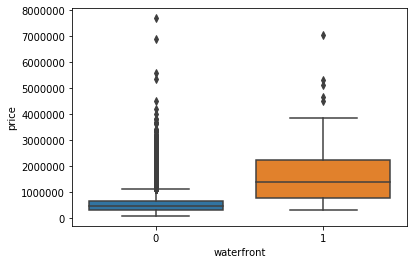

In [20]:
#Question:4
#Box Plot

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x="waterfront", y="price", data=df)

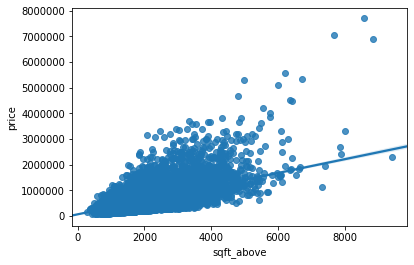

In [21]:
#Question:5
#RegPlot

ax=sns.regplot(x="sqft_above",y="price",data=df)

In [22]:
#Question:6
#Simple Linear Regression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

lm=LinearRegression()
X=df[["sqft_living"]]
Y=df["price"]
lm.fit(X,Y)
Yhat=lm.predict(X)
print("b0 = ",lm.intercept_)
print("b1 = ",lm.coef_)
print("MSE = ",mean_squared_error(df["price"],Yhat))
print("R^2 = ", lm.score(X,Y))

b0 =  -43580.74309447582
b1 =  [280.6235679]
MSE =  68351286833.039825
R^2 =  0.49285321790379316


In [23]:
#Question:7
#Multiple Linear Regression

Z = df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df["price"]
lm.fit(Z,Y)
Yhat = lm.predict(Z)
print("b0 = ",lm.intercept_)
print("b1 = ",lm.coef_)
print("MSE = ",mean_squared_error(df["price"],Yhat))
print("R^2 = ", lm.score(Z,Y))


b0 =  -32391285.62791595
b1 =  [-2.93603647e+04  6.02159907e+05  6.72996076e+05 -2.58758381e+04
  6.56651667e+02  6.70474993e+04 -3.44979083e+03  4.31648702e+00
  6.57101374e+02  8.21646063e+04 -4.62757778e+02]
MSE =  46131028319.18927
R^2 =  0.6577211102987311


In [100]:
#Question:8
#Pipleline object

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe=Pipeline(input)
X = df1[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df1["price"]
pipe.fit(X,Y)
Yhat=pipe.predict(X)
print("R^2[] = ",pipe.score(X,Y))

R^2[] =  0.7513316864572647


In [106]:
#Question:9
#Ridge Regression

from sklearn.linear_model import Ridge

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]    
X = df1[features ]
Y = df1['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

rid = Ridge(alpha=0.1)
rid.fit(x_train,y_train)
print("R^2 = ",rid.score(x_test,y_test))


number of test samples : 3242
number of training samples: 18371
R^2 =  0.6480385015855323


In [121]:
#Question:10
#Polynomial Regression

pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
print("R^2 = ",rig.score(x_test_pf,y_test))

R^2 =  0.7004334881252772


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20382e-20): result may not be accurate.
  overwrite_a=True).T
